In [8]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
warnings.simplefilter("ignore")
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.linear_model import LogisticRegression

In [9]:
#Data Familarization

#read the data
sal=pd.read_csv('salary.csv')
sal


,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,2899.00,34788.00,770781,NaN,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,5500.00,66000.00,847431,NaN,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,...,12.93000,20.0,1120.60,13447.20,34266,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN


In [10]:
sal.describe()

,AGENCY,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,multiple_full_time_jobs,summed_annual_salary
count,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,1.494810e+05,14.0,16.000000
mean,545.736288,0.346488,39.714918,4226.184248,50714.210973,5.651930e+05,1.0,74303.955000
std,139.057691,4.211485,2.323855,2093.111691,25117.340292,4.786212e+05,0.0,51925.944282
min,101.000000,0.000000,1.000000,50.000000,600.000000,1.000000e+00,1.0,18000.000000
25%,529.000000,0.000000,40.000000,3019.840000,36238.080000,1.133340e+05,1.0,32962.500000
50%,530.000000,0.000000,40.000000,3720.170000,44642.040000,3.463730e+05,1.0,48063.300000
75%,696.000000,0.000000,40.000000,4865.810000,58389.720000,1.100500e+06,1.0,123751.770000
max,930.000000,117.788480,70.000000,46125.000000,553500.000000,1.271604e+06,1.0,171383.400000


In [11]:
sal.shape

(149481, 21)

In [12]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS CODE               149481 non-null  object 
 6   CLASS TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY RATE                149481 non-null  float64
 12  HRS PER WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

In [19]:
null_values=sal.isna().sum()
null_values

AGENCY                                0
AGENCY NAME                           0
LAST NAME                             0
FIRST NAME                            0
MI                                    0
CLASS CODE                            0
CLASS TITLE                           0
ETHNICITY                             0
GENDER                                0
STATUS                                0
EMPLOY DATE                           0
HRLY RATE                             0
HRS PER WK                            0
MONTHLY                               0
ANNUAL                                0
STATE NUMBER                          0
duplicated                            0
multiple_full_time_jobs               0
combined_multiple_jobs                0
summed_annual_salary                  0
hide_from_search                      0
AGENCY is_missing                     0
AGENCY NAME is_missing                0
LAST NAME is_missing                  0
FIRST NAME is_missing                 0


In [13]:
for label,content in sal.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

AGENCY NAME
LAST NAME
FIRST NAME
MI
CLASS CODE
CLASS TITLE
ETHNICITY
GENDER
STATUS
EMPLOY DATE
duplicated
combined_multiple_jobs
hide_from_search


In [22]:
for label,content in sal.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

AGENCY
AGENCY NAME
LAST NAME
FIRST NAME
MI
CLASS CODE
CLASS TITLE
ETHNICITY
GENDER
STATUS
EMPLOY DATE
HRLY RATE
HRS PER WK
MONTHLY
ANNUAL
STATE NUMBER
duplicated
multiple_full_time_jobs
combined_multiple_jobs
summed_annual_salary
hide_from_search
AGENCY is_missing
AGENCY NAME is_missing
LAST NAME is_missing
FIRST NAME is_missing
MI is_missing
CLASS CODE is_missing
CLASS TITLE is_missing
ETHNICITY is_missing
GENDER is_missing
STATUS is_missing
EMPLOY DATE is_missing
HRLY RATE is_missing
HRS PER WK is_missing
MONTHLY is_missing
ANNUAL is_missing
STATE NUMBER is_missing
duplicated is_missing
multiple_full_time_jobs is_missing
combined_multiple_jobs is_missing
summed_annual_salary is_missing
hide_from_search is_missing


In [14]:
for label, content in sal.items():
    if pd.api.types.is_string_dtype(content) | pd.api.types.is_numeric_dtype(content):
        sal[label] = content.astype("category").cat.as_ordered()

In [15]:
for label,content in sal.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        sal[label+" is_missing"]=pd.isnull(content)
        # Turn categories into numbers and add+1
        sal[label] = pd.Categorical(content).codes+1

In [16]:
sal.isna().sum()

AGENCY                                0
AGENCY NAME                           0
LAST NAME                             0
FIRST NAME                            0
MI                                    0
CLASS CODE                            0
CLASS TITLE                           0
ETHNICITY                             0
GENDER                                0
STATUS                                0
EMPLOY DATE                           0
HRLY RATE                             0
HRS PER WK                            0
MONTHLY                               0
ANNUAL                                0
STATE NUMBER                          0
duplicated                            0
multiple_full_time_jobs               0
combined_multiple_jobs                0
summed_annual_salary                  0
hide_from_search                      0
AGENCY is_missing                     0
AGENCY NAME is_missing                0
LAST NAME is_missing                  0
FIRST NAME is_missing                 0


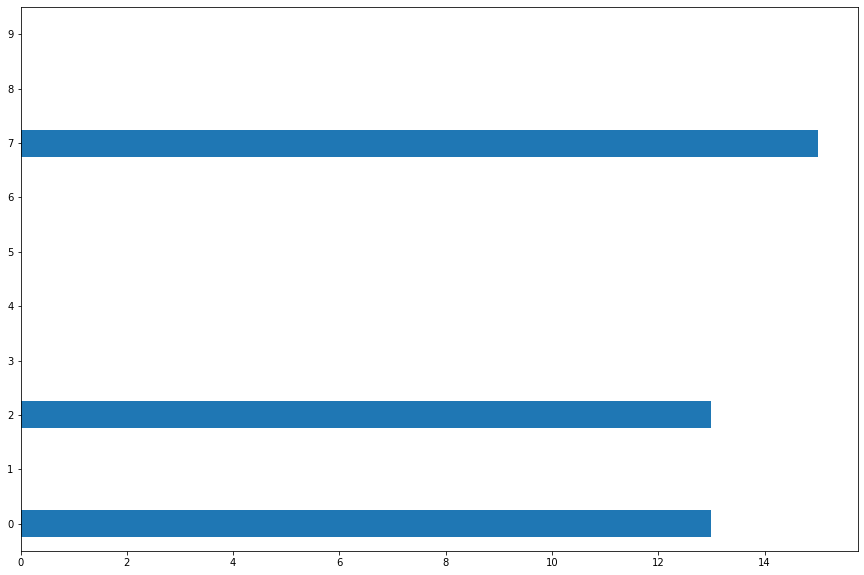

In [17]:
ms = sal["summed_annual_salary"][:10].plot.barh(figsize=(15,10))

<AxesSubplot:>

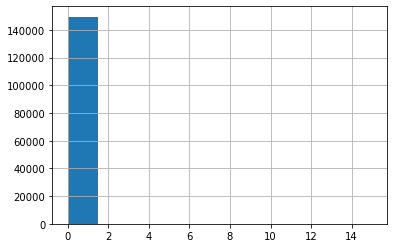

In [18]:
sal["summed_annual_salary"].hist()

<AxesSubplot:xlabel='AGENCY'>

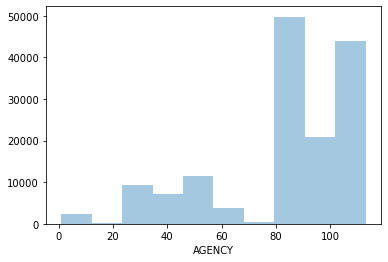

In [19]:
sns.distplot(sal['AGENCY'], kde=False, bins=10)

<AxesSubplot:xlabel='HRS PER WK', ylabel='summed_annual_salary'>

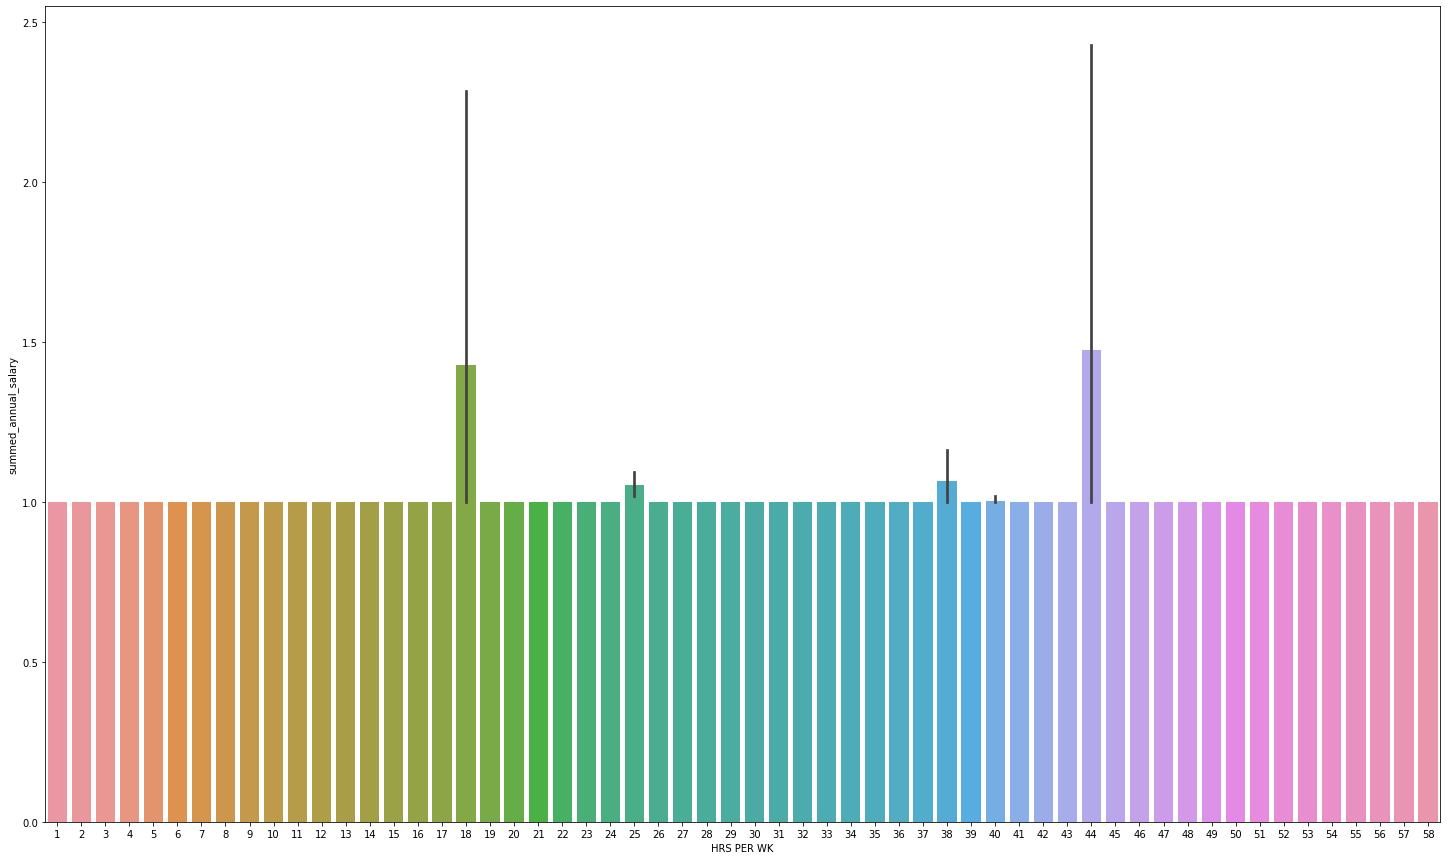

In [42]:
fig, ax = plt.subplots(figsize=(25,15)) 
sns.barplot(y='summed_annual_salary', x='HRS PER WK', data=sal)

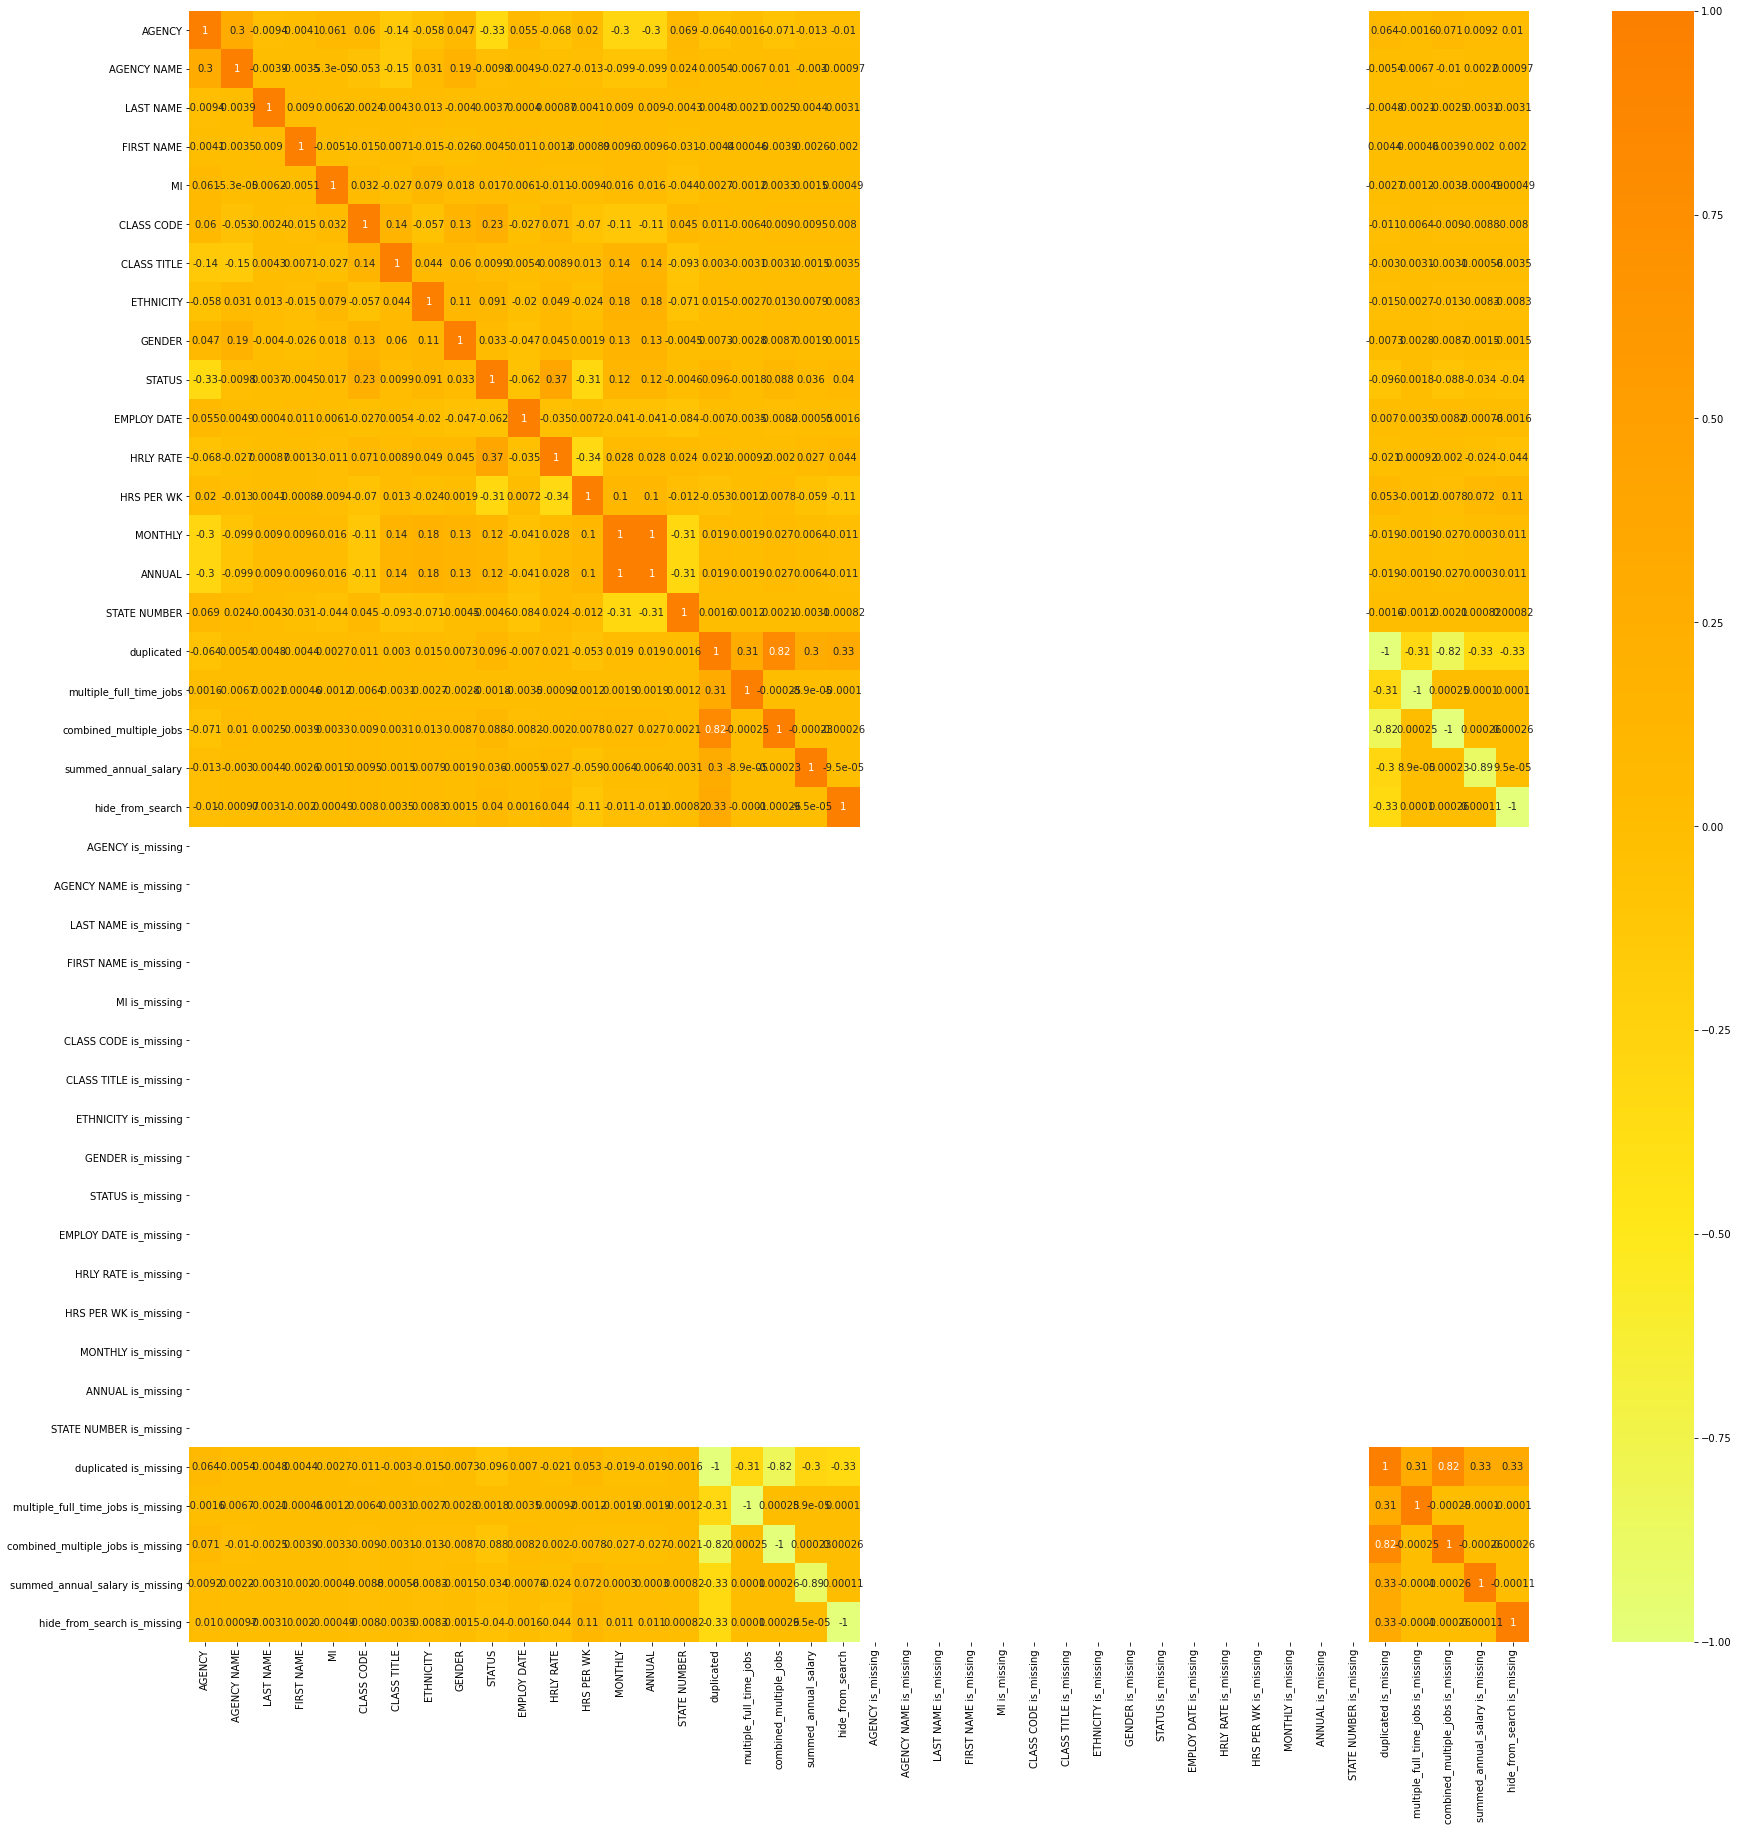

In [24]:
corr = sal.corr()
fig, ax = plt.subplots(figsize=(30,30)) 
sns.heatmap(corr, cmap = 'Wistia', annot= True)
plt.show(sns)

In [25]:
X = sal.drop("summed_annual_salary",axis=1)
y = sal["summed_annual_salary"]

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [27]:
from sklearn.metrics import mean_absolute_error
y_preds_0 = model.predict(X_test)
mae_rf = mean_absolute_error(y_test,y_preds_0)
mae_rf

3.411713549854502e-05

In [28]:
from sklearn.model_selection import RandomizedSearchCV
np.random.seed(42)
grid = {
    "n_estimators":np.arange(10,100,10),
    "max_depth":[None,3,5,10],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,20,2),
    "max_features": [0.5,1,"sqrt","auto"],
    "max_samples":[10000,12000,15000,20000]
}
rs_model = RandomizedSearchCV(
RandomForestRegressor(n_jobs=-1,
                     random_state=42),
                    param_distributions = grid,
                     n_iter=5,
                    cv=5,
                    verbose=True)
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   22.9s finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000, 12000, 15000,
                                                        20000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [30]:
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_samples': 12000,
 'max_features': 0.5,
 'max_depth': None}

In [32]:
y_preds_rs = rs_model.predict(X_test)
mae_hyp = mean_absolute_error(y_test,y_preds_rs)
mae_hyp,mae_rf

(0.0007857329302206715, 3.411713549854502e-05)

In [33]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [34]:
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
y_pred

array([-0.00082569, -0.00077976,  0.00022592, ..., -0.00087608,
        0.00058952, -0.00093219])

In [35]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7809428607555963

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_predict=knn.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [40]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_prediction=clf.predict(X_test)
y_prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [7]:
from sklearn.metrics import r2_score
r2_score(y_test,y_prediction)

NameError: name 'y_prediction' is not defined